<a href="https://colab.research.google.com/github/maliksalman55/Final-code/blob/main/VGG_16_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil

src_path = '/content/drive/MyDrive/kaggle (1).json'
dest_directory = '/root/.kaggle/'

# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)

'/root/.kaggle/kaggle (1).json'

In [5]:
# run this for dataset download
!kaggle datasets download -d markdaniellampa/fish-dataset

Dataset URL: https://www.kaggle.com/datasets/markdaniellampa/fish-dataset
License(s): Community Data License Agreement - Sharing - Version 1.0
 99% 1.57G/1.58G [00:18<00:00, 127MB/s]
100% 1.58G/1.58G [00:18<00:00, 89.7MB/s]


In [6]:
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/train', # I pass and use train dataset path.
    labels="inferred", # because we hv labels dataset.
    label_mode="categorical",   # we use categorical became we hv more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None, # if we need to rotate image then put seed value.
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8809 files belonging to 31 classes.


In [11]:
#Test Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2751 files belonging to 31 classes.


In [12]:
#loading the pretrained vgg16 model
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(224, 224, 3))  # Input size matches image_size

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
#  Building Model
model = tf.keras.Sequential()
#cnn = tf.keras.models.Sequential()


In [14]:
#Building Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(tf.keras.layers.Dropout(0.25)) # This dropout helps model to over fitting

In [17]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten()) #
model.add(tf.keras.layers.Dense(units=512,activation='relu')) # add nuronss 128.
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [19]:
#Output Layer
model.add(tf.keras.layers.Dense(units=31,activation='softmax')) # we use sotmax because we hv categorical data


In [20]:
#Compiling and Training Phase
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                        

In [22]:
# start traning also save traning history
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
276/276 [==============================] - 50s 152ms/step - loss: 4.7625 - accuracy: 0.1419 - val_loss: 3.0534 - val_accuracy: 0.1807
Epoch 2/32
276/276 [==============================] - 43s 152ms/step - loss: 2.9513 - accuracy: 0.2072 - val_loss: 2.6246 - val_accuracy: 0.3003
Epoch 3/32
276/276 [==============================] - 43s 151ms/step - loss: 2.6087 - accuracy: 0.2888 - val_loss: 2.3653 - val_accuracy: 0.3675
Epoch 4/32
276/276 [==============================] - 44s 155ms/step - loss: 2.3490 - accuracy: 0.3541 - val_loss: 2.0666 - val_accuracy: 0.4562
Epoch 5/32
276/276 [==============================] - 42s 148ms/step - loss: 2.1028 - accuracy: 0.4119 - val_loss: 1.8979 - val_accuracy: 0.5278
Epoch 6/32
276/276 [==============================] - 41s 146ms/step - loss: 1.8962 - accuracy: 0.4618 - val_loss: 1.4935 - val_accuracy: 0.6129
Epoch 7/32
276/276 [==============================] - 43s 153ms/step - loss: 1.6895 - accuracy: 0.5199 - val_loss: 1.4559 - val_ac

In [23]:
# Evaluating Model
# Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

276/276 [==============================] - 33s 114ms/step - loss: 0.0473 - accuracy: 0.9919
Training accuracy: 0.9919400811195374


In [24]:
# Test set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Test accuracy:', val_acc)

86/86 [==============================] - 9s 90ms/step - loss: 0.2699 - accuracy: 0.9455
Test accuracy: 0.94547438621521


In [25]:
 # I save VGG-16 model is file extension
model.save('/content/drive/MyDrive/Models saver/Vgg16_model.keras')


In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/Models saver/Vgg16_model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

In [29]:
# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

In [30]:
# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 98ms/step


In [31]:
# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

In [32]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1  57   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   1   0   0   0   1   0   0   0   1   0   0]
 [  0   0  57   0   1   1   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   1   0   0   0   2   0   0]
 [  0   0   0  92   1   0   0   0   2   0   0   0   0   0   0   0   0   0
    1   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   1   0   0   0   1   0   0]
 [  0   0   0   0   0  56   0   0   1   0   0   0   0   0   1   0   0   0
    0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  81   0   1   0   0   0   0   0   0   0   2   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 120   2   0   0   0   0   0   0   0   0   0
    0

In [33]:
# We can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, labels=range(31), target_names=validation_set.class_names)
print("Classification Report:")
print(report)


Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.98      0.96      0.97        52
        Big Head Carp       0.95      0.90      0.93        63
   Black Spotted Barb       0.93      0.90      0.92        63
              Catfish       0.95      0.95      0.95        97
       Climbing Perch       0.94      0.94      0.94        48
 Fourfinger Threadfin       0.92      0.93      0.93        60
       Freshwater Eel       0.93      0.96      0.95        84
       Glass Perchlet       0.98      0.97      0.97       124
                 Goby       0.88      0.97      0.92       189
            Gold Fish       1.00      0.95      0.98        65
              Gourami       0.96      0.99      0.97        97
           Grass Carp       0.97      0.97      0.97       378
 Green Spotted Puffer       1.00      0.88      0.94        34
          Indian Carp       0.96      0.90      0.93        81
  Indo-Pacific Tarpon       0.9

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

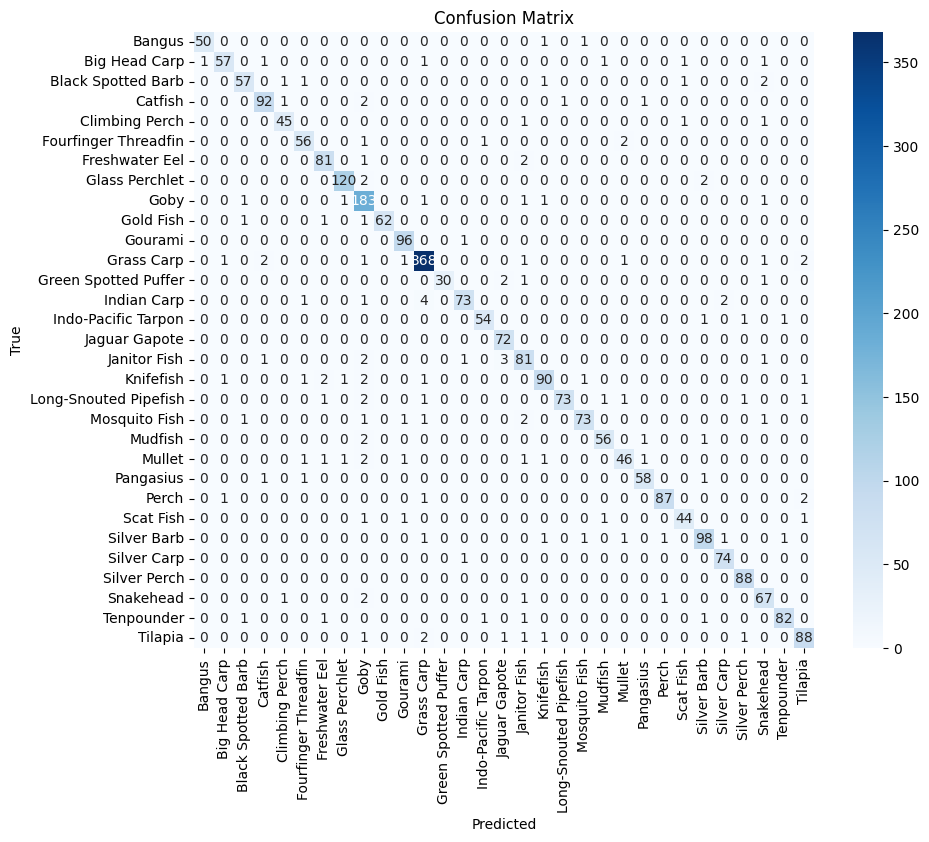

In [36]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
#Return Dictionary of history
training_history.history

{'loss': [4.762471675872803,
  2.951324701309204,
  2.6086831092834473,
  2.348958730697632,
  2.1028125286102295,
  1.8961759805679321,
  1.689518928527832,
  1.4890143871307373,
  1.3197662830352783,
  1.165371298789978,
  1.0574581623077393,
  0.9138317108154297,
  0.7774363160133362,
  0.7572782039642334,
  0.6650533676147461,
  0.6267024874687195,
  0.5044371485710144,
  0.4985080063343048,
  0.46233510971069336,
  0.416652649641037,
  0.37052494287490845,
  0.37392163276672363,
  0.3516778349876404,
  0.2992764711380005,
  0.29753318428993225,
  0.2835932672023773,
  0.28630319237709045,
  0.2936328053474426,
  0.25479984283447266,
  0.26277992129325867,
  0.23576731979846954,
  0.21159499883651733],
 'accuracy': [0.14190033078193665,
  0.20717447996139526,
  0.2887955605983734,
  0.35406970977783203,
  0.41185152530670166,
  0.4618004262447357,
  0.5199227929115295,
  0.5762288570404053,
  0.6248155236244202,
  0.6657963395118713,
  0.6948575377464294,
  0.7421954870223999,
  0.

In [45]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [46]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [47]:
#Calculating Accuracy of Model Achieved on Test set
print("Test set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100)) # (-1) show use final Accuracy


Test set Accuracy: 94.547438621521 %


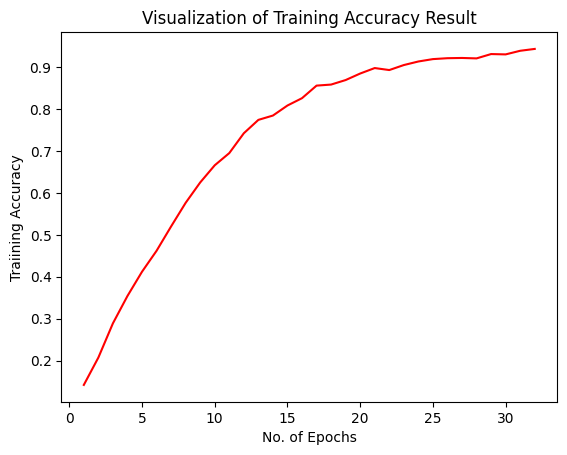

In [48]:
#Accuracy Visualization Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

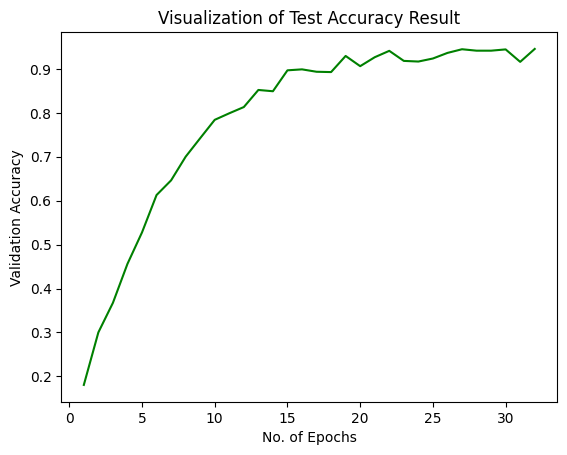

In [49]:
#Test Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='Green')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Test Accuracy Result')
plt.show()

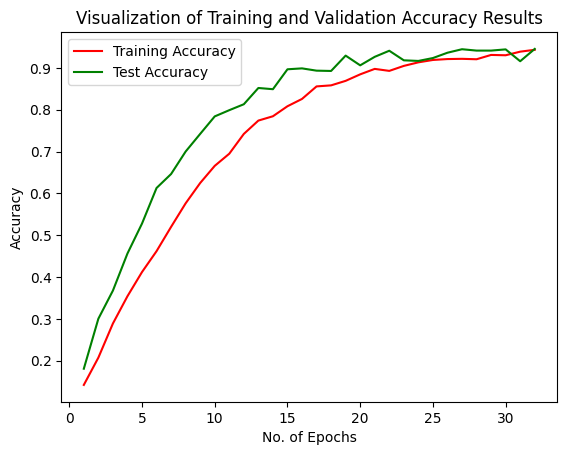

In [50]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 33)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='Green', label='Test Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Validation Accuracy Results')
plt.legend()
plt.show()